<h1 align=center> BodyFat prediction </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import f_regression,SelectKBest
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(252, 15)

In [6]:
df.size

3780

In [7]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [8]:
df=df[['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist','BodyFat']]

In [9]:
df

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,11.0
248,1.0236,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,33.6
249,1.0328,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,29.3
250,1.0399,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   Age      252 non-null    int64  
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
 14  BodyFat  252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [13]:
df.describe()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,19.150794
std,0.019031,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,8.368740
min,0.995000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,0.000000
25%,1.041400,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,12.475000
50%,1.054900,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,19.200000
75%,1.070400,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,25.300000
max,1.108900,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,47.500000


In [14]:
palette = itertools.cycle(sns.color_palette())

## Exploratory data analysis

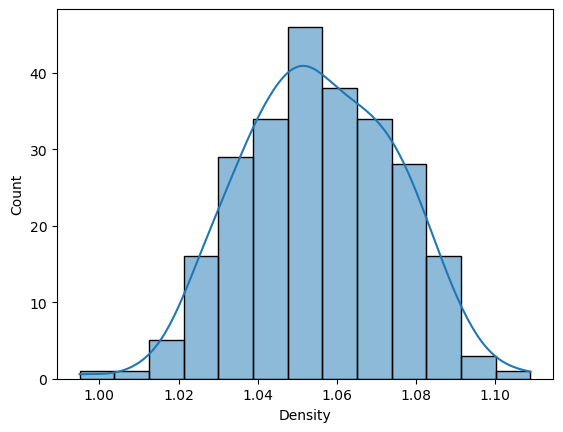

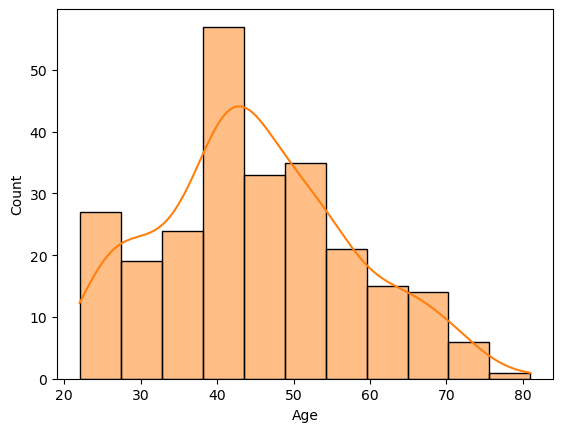

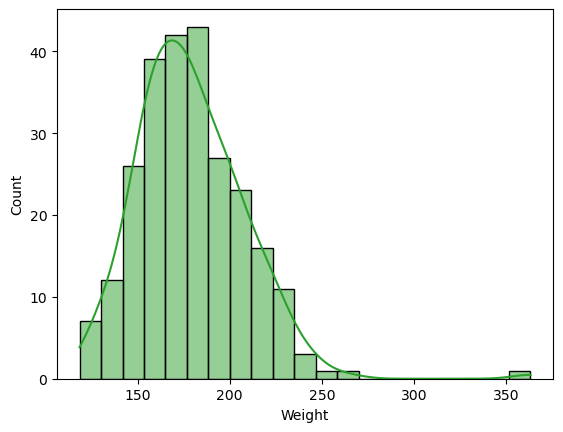

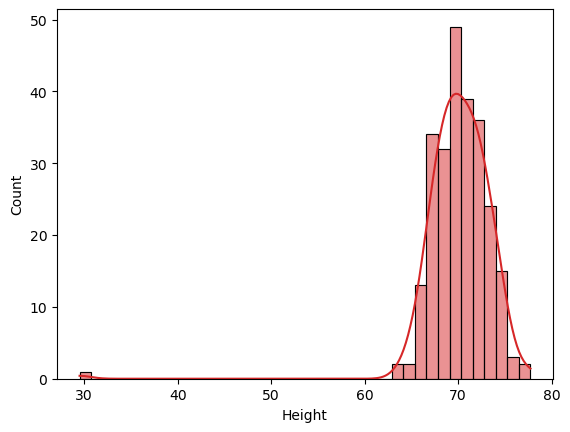

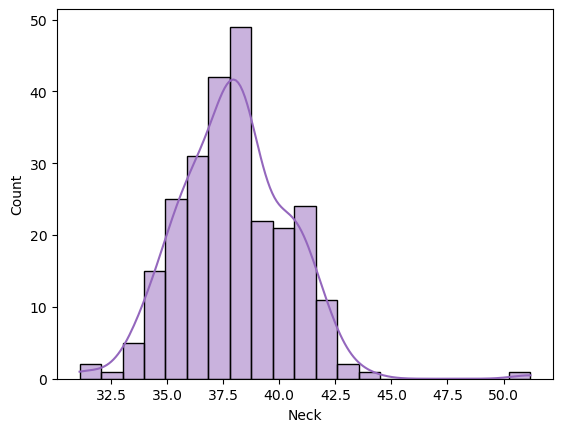

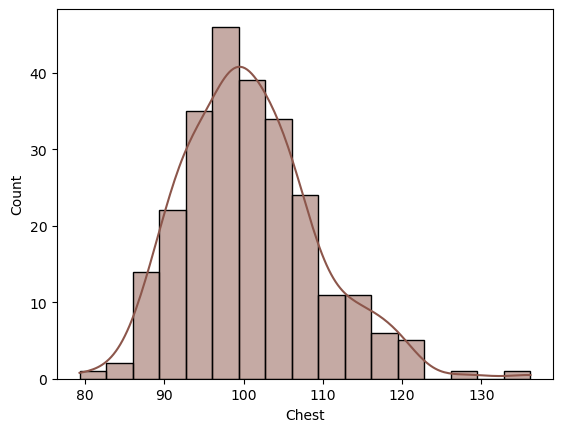

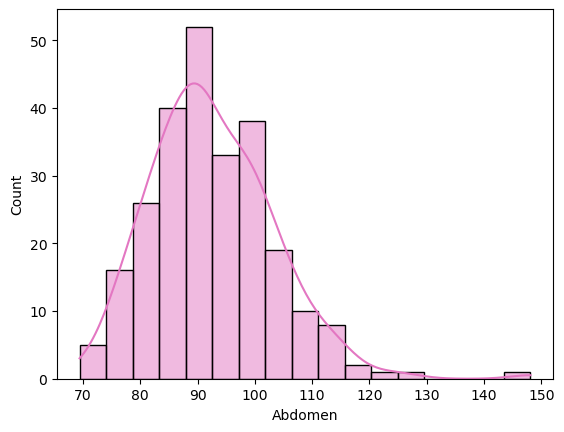

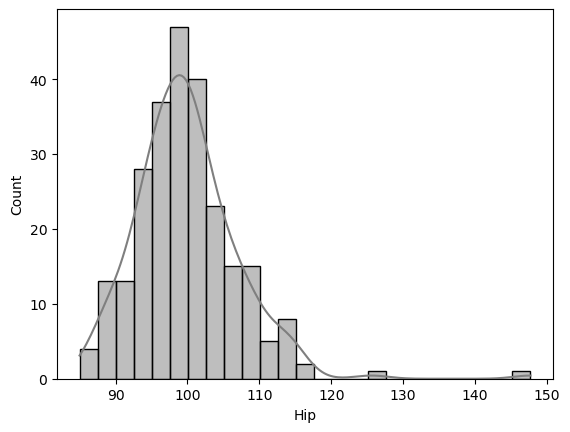

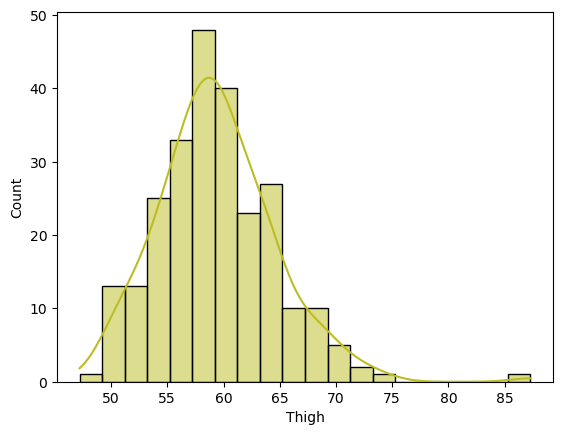

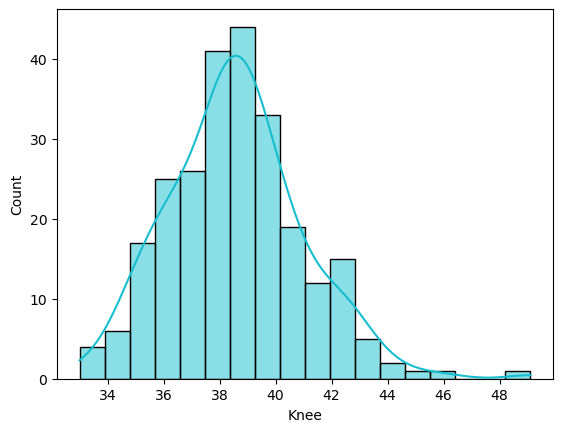

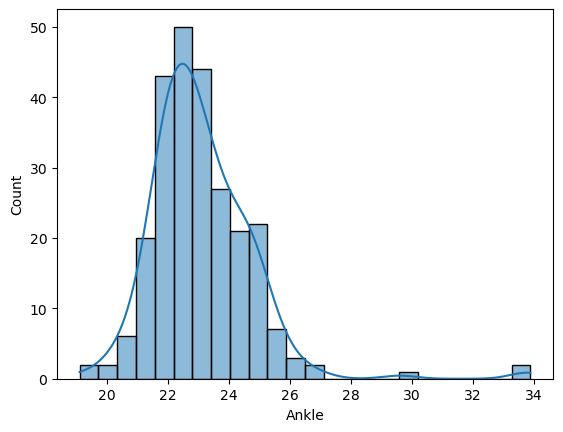

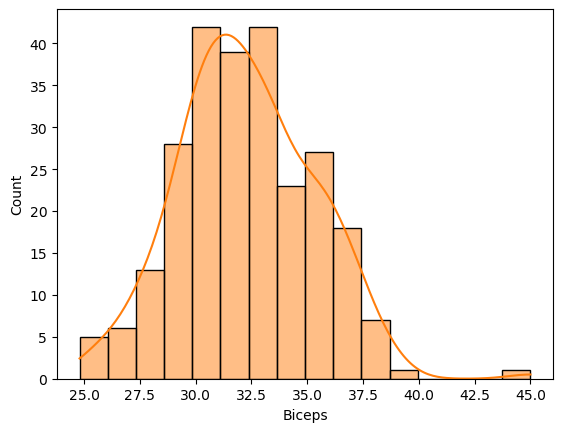

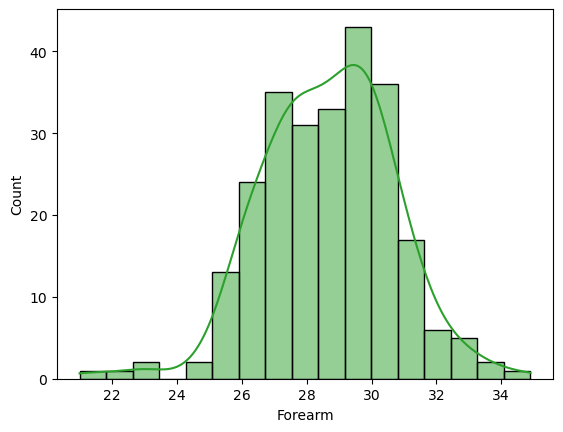

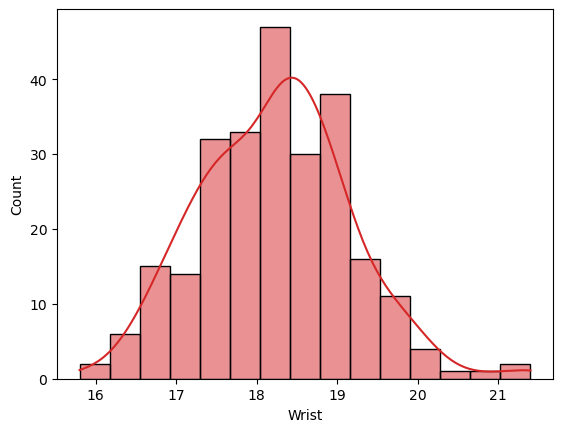

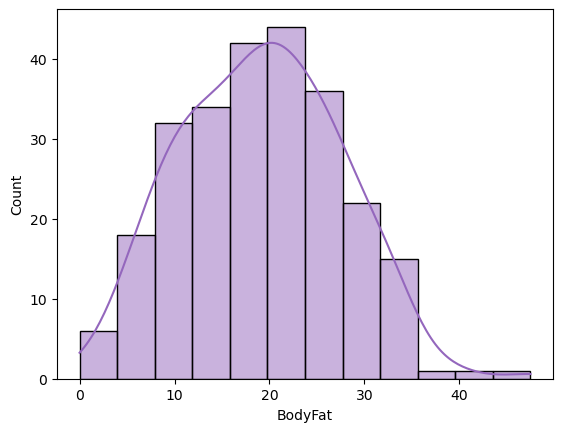

In [15]:
# Histogram
for i in df.columns:
    sns.histplot(x=df[i],kde=True,color=next(palette))
    plt.show()

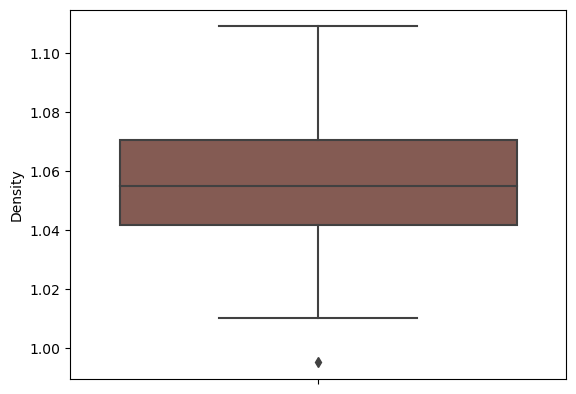

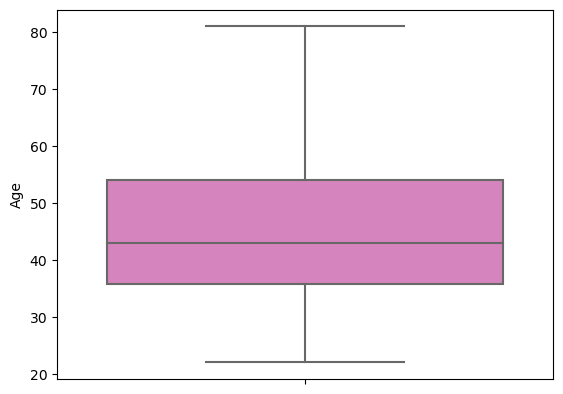

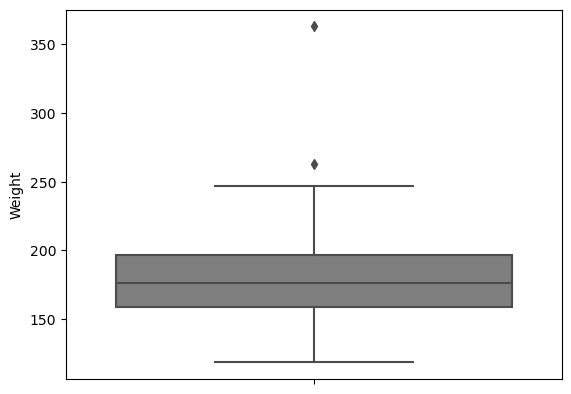

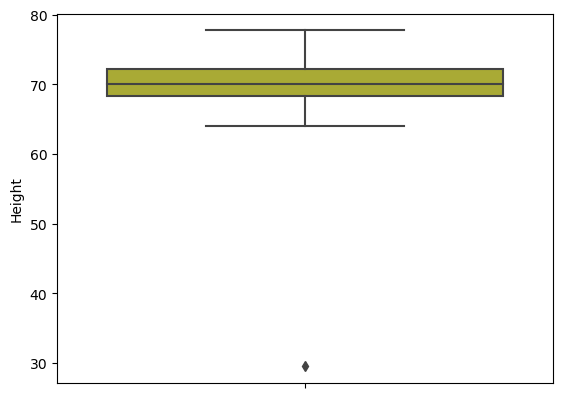

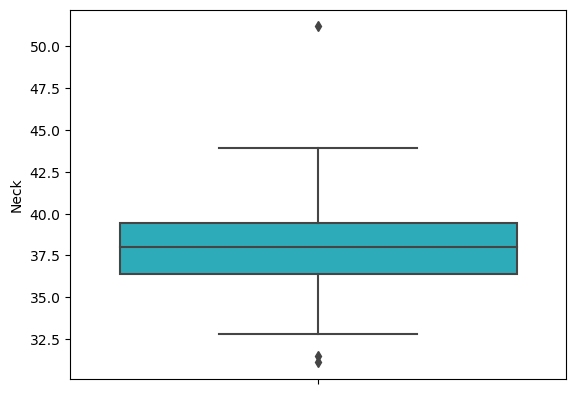

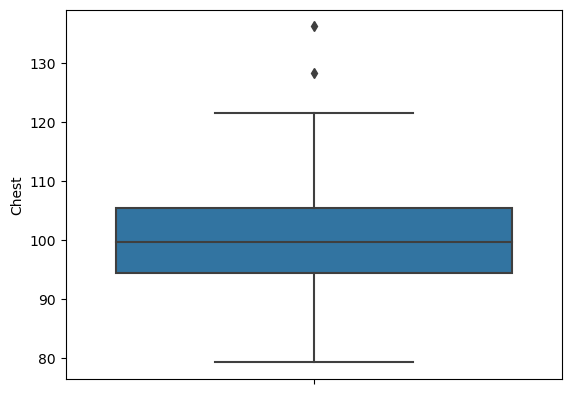

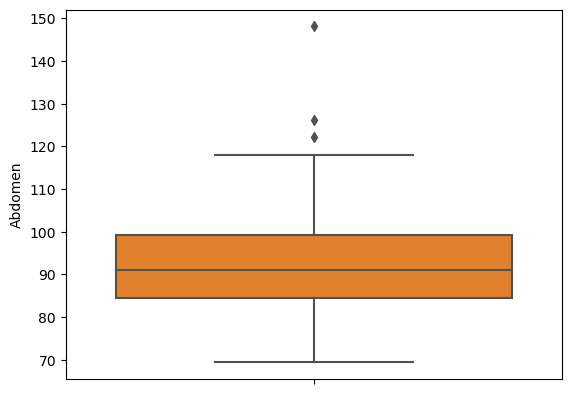

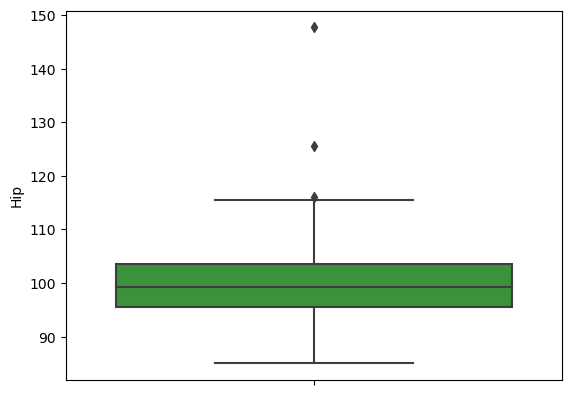

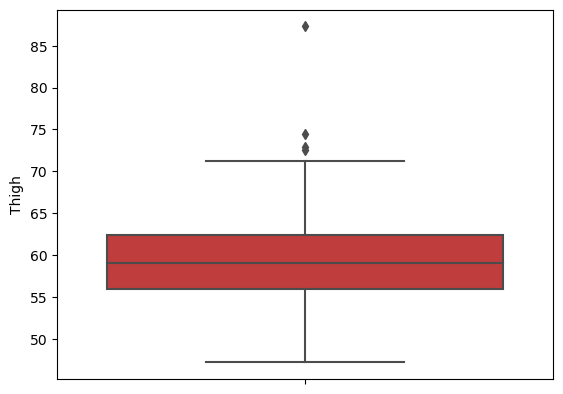

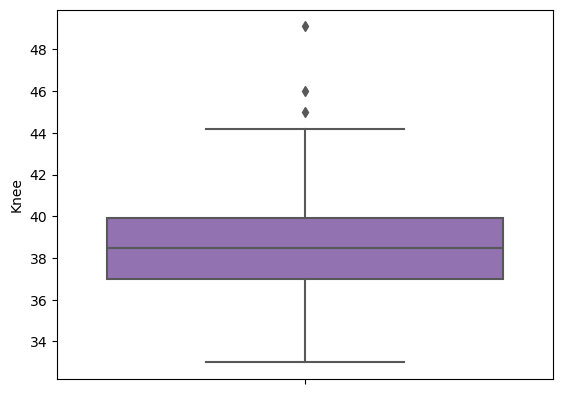

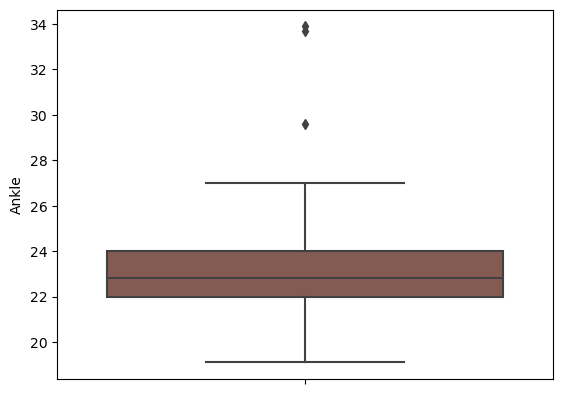

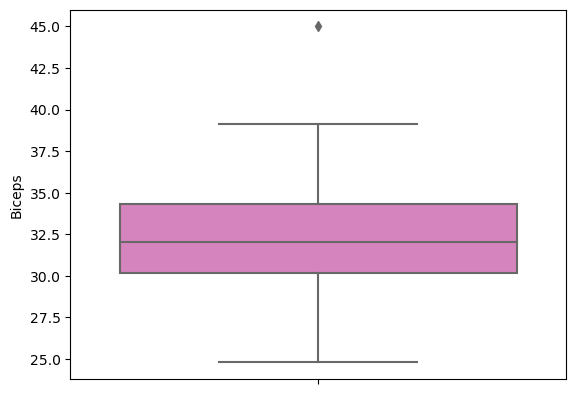

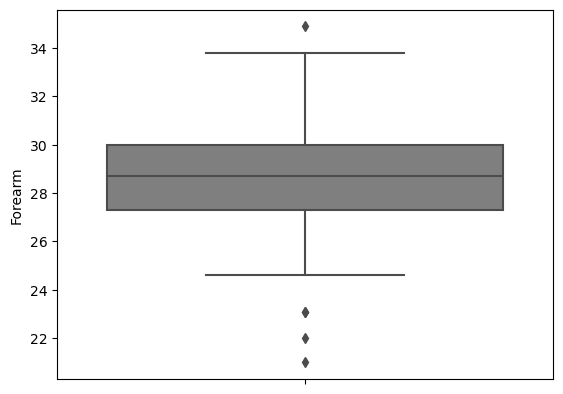

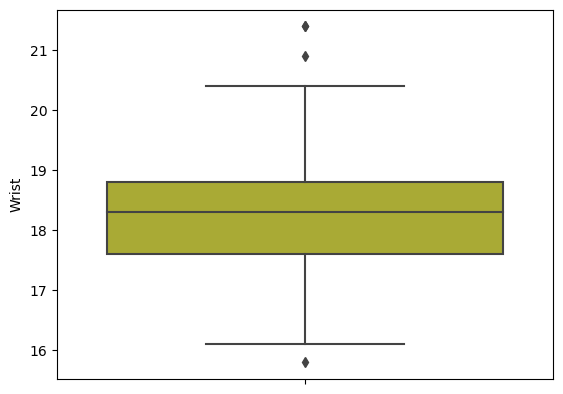

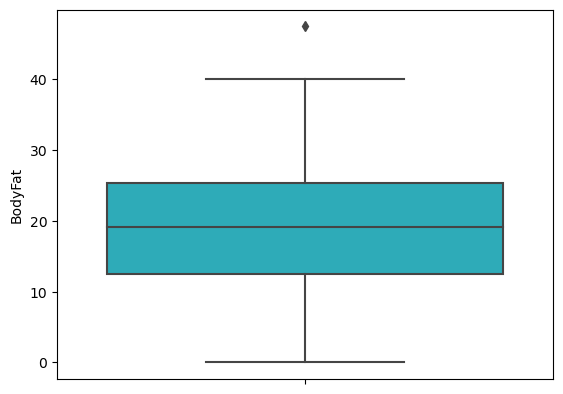

In [16]:
# Boxplot
for i in df.columns:
    sns.boxplot(y=df[i],color=next(palette))
    plt.show()

## Outlier treatment

In [21]:
# IQR method
def Outerlimit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [22]:
for i in df.columns:
    UL,LL = Outerlimit(df[i])
    df[i] = np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

In [23]:
UL,LL = Outerlimit(df.BodyFat)
df['BodyFat'] = np.where((df.BodyFat>UL)|(df.BodyFat<LL),np.nan,df.BodyFat)

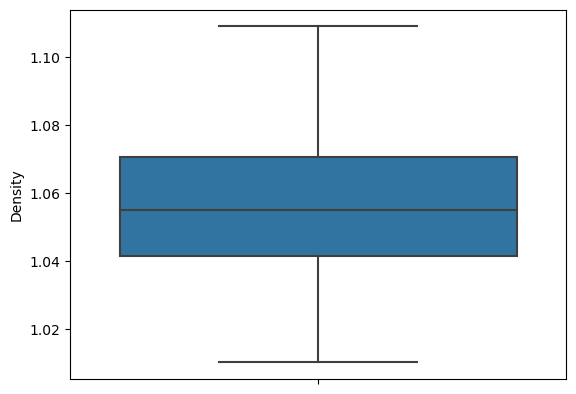

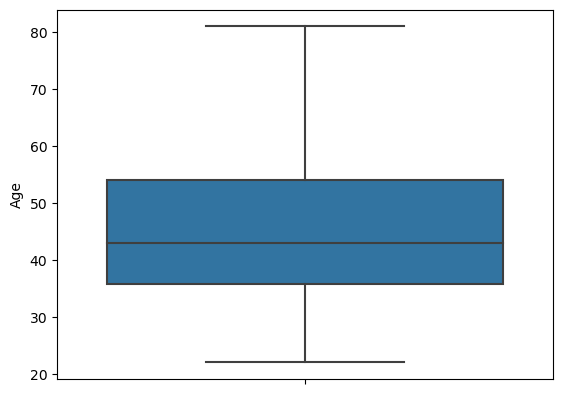

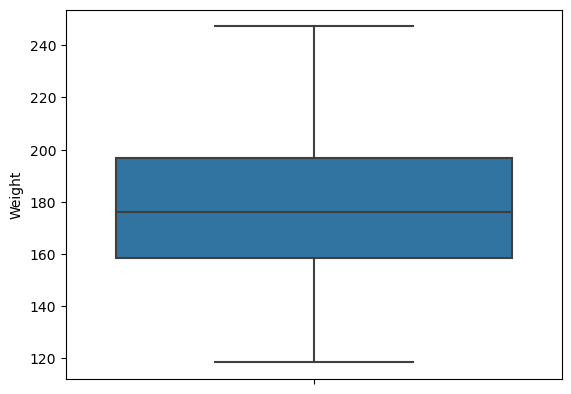

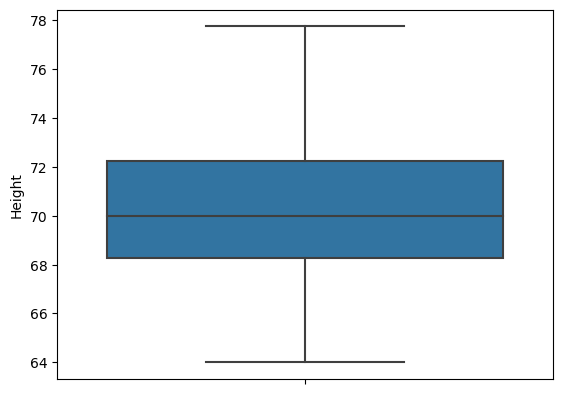

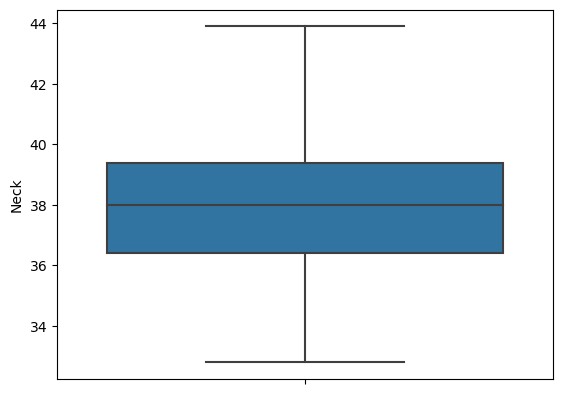

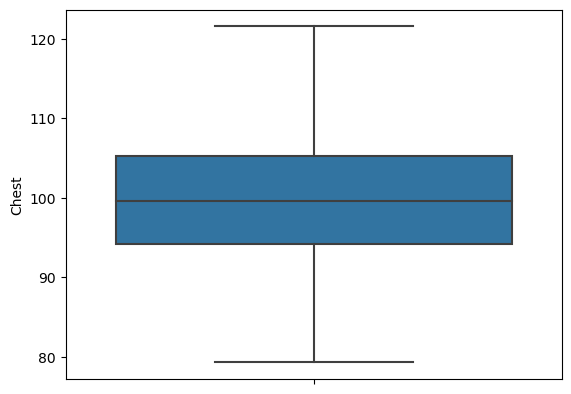

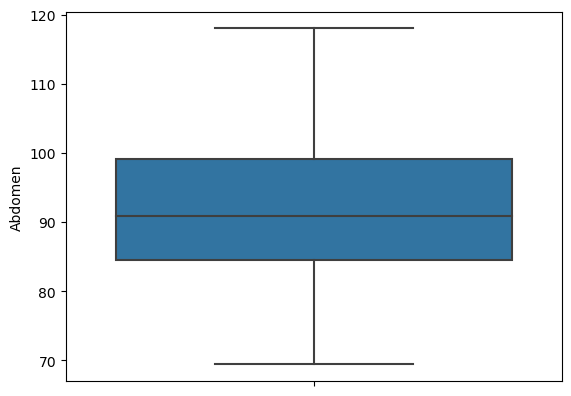

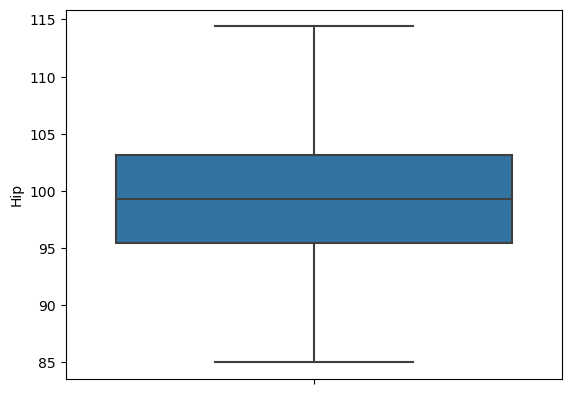

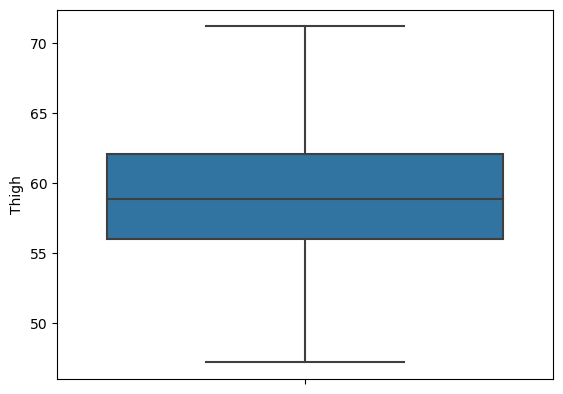

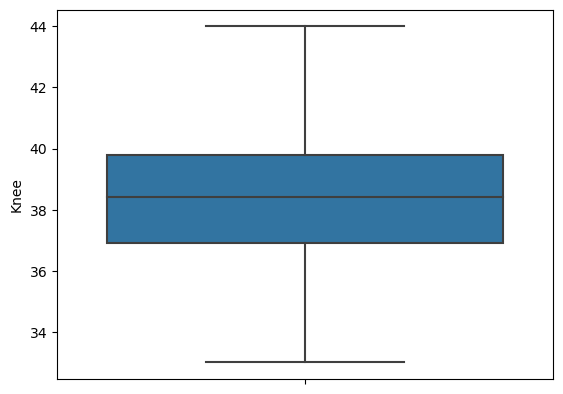

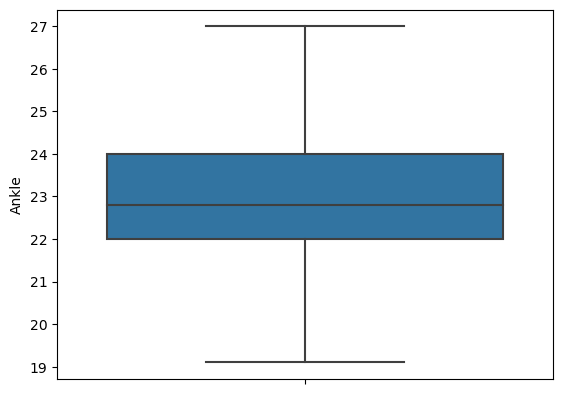

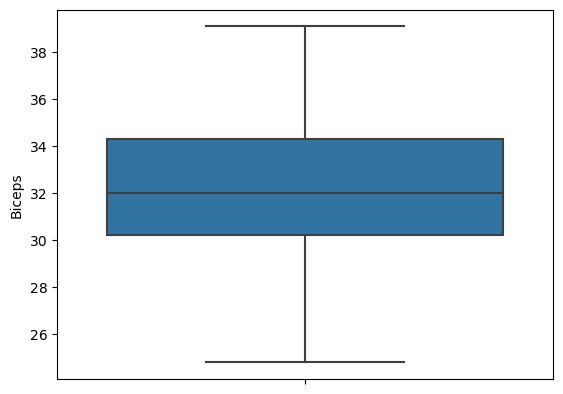

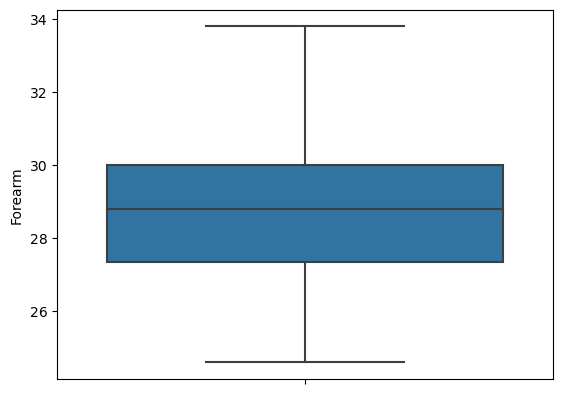

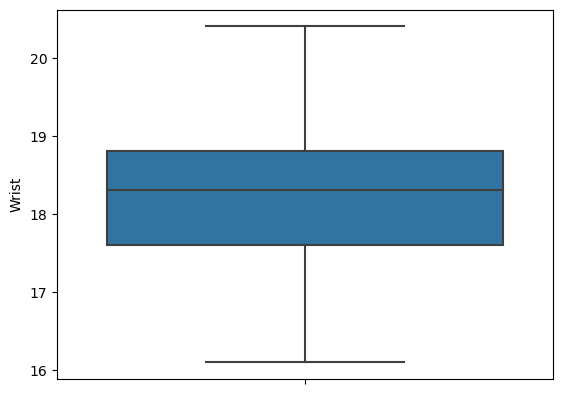

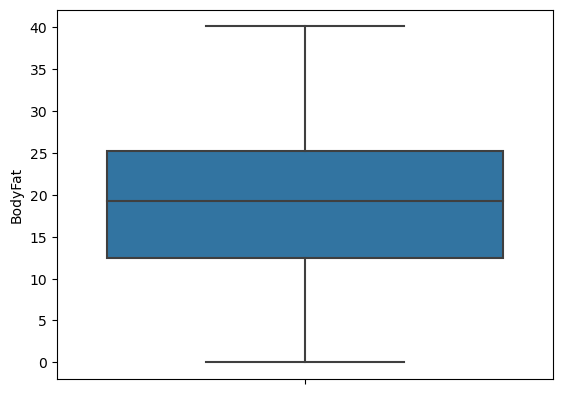

In [24]:
for i in df.columns:
    sns.boxplot(y=df[i])
    plt.show()

In [25]:
df.dropna(inplace=True)

In [26]:
df.shape

(233, 15)

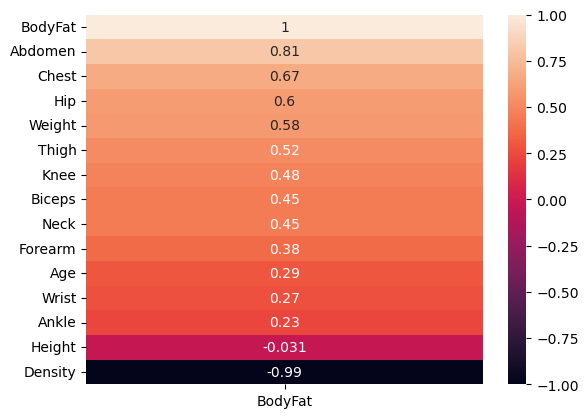

In [27]:
sns.heatmap(df.corr()[['BodyFat']].sort_values(by="BodyFat",ascending=False),vmax=1,vmin=-1,annot=True)
plt.show()

### selecting features and targets

In [28]:
x= df.iloc[:,0:-1].values

In [29]:
y = df.iloc[:,-1].values

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
sc = StandardScaler()

In [32]:
x = sc.fit_transform(x)

### Model building

In [33]:
models = {"LinearRegression":LinearRegression(),
          "Ridge":Ridge(),
          "Lasso":Lasso(),
          "RandomForestRegressor":RandomForestRegressor(),
          "AdaBoostRegressor":AdaBoostRegressor(),
          "GradientBoostingRegressor":GradientBoostingRegressor(),
          "DecisionTreeRegressor":DecisionTreeRegressor(),
          "LinearSVR":LinearSVR()
    
}

In [34]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("Cross validation model:{}".format(name))
    rmse = np.sqrt(-scores)
    rmse_avg = np.mean(rmse)
    print("Avg rmse",rmse_avg)
    print('*'*100)

Cross validation model:LinearRegression
Avg rmse 1.1076126114231397
****************************************************************************************************
Cross validation model:Ridge
Avg rmse 1.1259317465095413
****************************************************************************************************
Cross validation model:Lasso
Avg rmse 1.5487590932397626
****************************************************************************************************
Cross validation model:RandomForestRegressor
Avg rmse 0.9793158044439909
****************************************************************************************************
Cross validation model:AdaBoostRegressor
Avg rmse 1.6530502760759103
****************************************************************************************************
Cross validation model:GradientBoostingRegressor
Avg rmse 1.1114867212388782
**********************************************************************************************

### selecting Linear SVR

In [35]:
Model = LinearSVR()

In [36]:
L_model = LinearSVR().fit(x_train,y_train)
y_pred = L_model.predict(x_test)
score = r2_score(y_test,y_pred)
print("Score is {}".format(score))

Score is 0.4135436514777955


In [37]:
L_model.fit(x_train,y_train)

LinearSVR()

In [38]:
y_pred = L_model.predict(x_train)

In [39]:
L_model.score(x_test,y_test)

0.4821505721200242

In [40]:
L_model.score(x_train,y_train)

0.5473489136822749

In [41]:
y_train.shape

(186,)

In [43]:
x_train.shape

(186, 14)

In [44]:
Model.fit(x_train, y_train)

LinearSVR()

In [45]:
y_pred = Model.predict(x_test)

In [46]:
Model.score(x_train, y_train)

0.724288869610503

In [47]:
Model.score(x_test, y_test)

0.6262508923404816

In [48]:
Output = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'],dtype=float)
Output.head()

,Actual,Prediction
0,8.5,10.612290
1,26.7,24.310548
2,29.3,36.686856
3,11.7,10.067997
4,27.1,25.617913


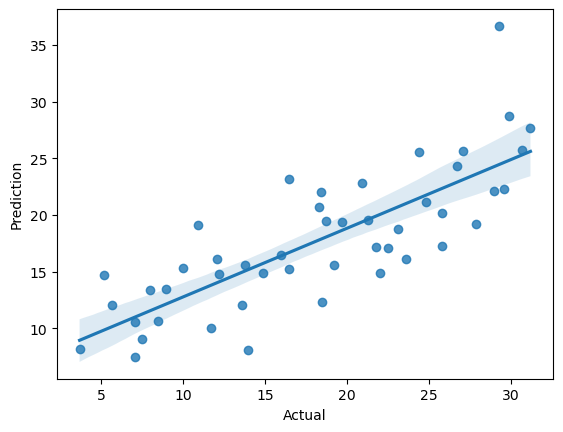

In [49]:
sns.regplot(data=Output,x='Actual',y='Prediction')
plt.show()